# Fake News Detection Using Machine Learning and Deep Learning Models: A Comparative Study on the WELFake Dataset

# Step 1 : Importing Libraries , Loading the dataset and Basic Operations

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Loading the original dataset
df = pd.read_csv("FakeNews_Dataset.csv")

print("Original Dataset loaded successfully!")
print("Original Shape of dataset:", df.shape)

print("\nFirst 5 rows:\n")
print(df.head())

# Number of observations and features
num_observations = df.shape[0]
num_features = df.shape[1]
print(f"\nNumber of observations (rows): {num_observations}")
print(f"Number of features (columns): {num_features}")

Original Dataset loaded successfully!
Original Shape of dataset: (72134, 4)

First 5 rows:

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Number of observations (rows): 72134
Number of features (columns): 4


# Step 2 : Taking only 15000 observations

In [2]:
desired_samples = 15000

if len(df) >= desired_samples:
    df = df.sample(n=desired_samples, random_state=42)
    df.reset_index(drop=True, inplace=True)
    print(f"\nDataset reduced to {desired_samples} observations.")
else:
    print(f"\nDataset has only {len(df)} rows, cannot sample {desired_samples}.")

print("New Shape of dataset:", df.shape)

# Saving the reduced dataset to a new CSV file
output_file = "FakeNews_15000.csv"
df.to_csv(output_file, index=False)

print(f"\nReduced dataset saved as: {output_file}")


Dataset reduced to 15000 observations.
New Shape of dataset: (15000, 4)

Reduced dataset saved as: FakeNews_15000.csv


# Step 3 : Target Variable and few more operaitons

In [3]:
# Target Variable 

target_col = None
for col in df.columns:
    if df[col].nunique() <= 5 and df[col].dtype != 'object':
        target_col = col
        break

if target_col is None:
    target_col = df.columns[-1]  # fallback to last column if not found

print(f"\nDetected Target Variable: {target_col}")

#  Independent variables
independent_vars = [col for col in df.columns if col != target_col]
print("\nIndependent Variables:")
print(independent_vars)

# Column information
print("\nColumn Information:")
print(df.info())

# Summary statistics
print("\nStatistical Summary:\n")
print(df.describe())



Detected Target Variable: label

Independent Variables:
['Unnamed: 0', 'title', 'text']

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15000 non-null  int64 
 1   title       14889 non-null  object
 2   text        14993 non-null  object
 3   label       15000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 468.9+ KB
None

Statistical Summary:

         Unnamed: 0         label
count  15000.000000  15000.000000
mean   36029.049000      0.509267
std    20692.703553      0.499931
min        4.000000      0.000000
25%    18055.250000      0.000000
50%    36153.000000      1.000000
75%    53668.250000      1.000000
max    72124.000000      1.000000


# Step 4 : Exploratory Data Analsysis (EDA) and visualisations


Detected Text Column: title


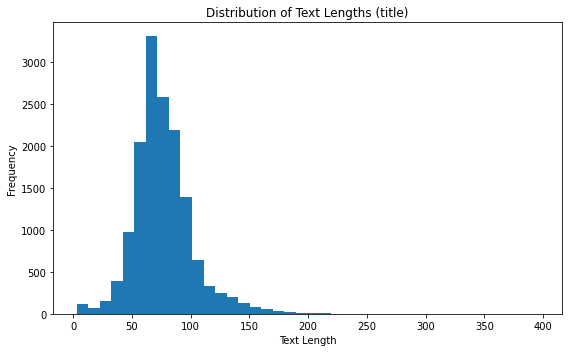

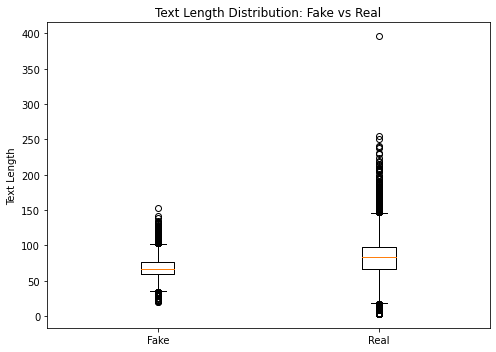

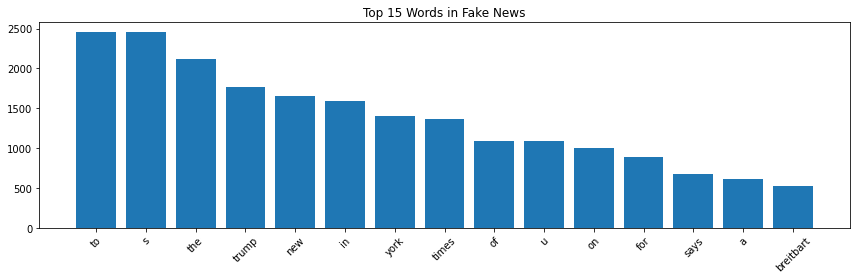

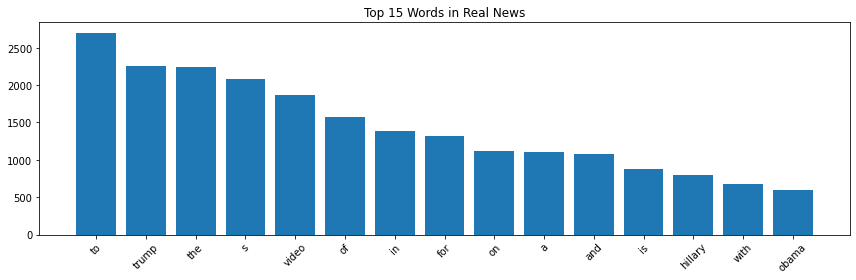

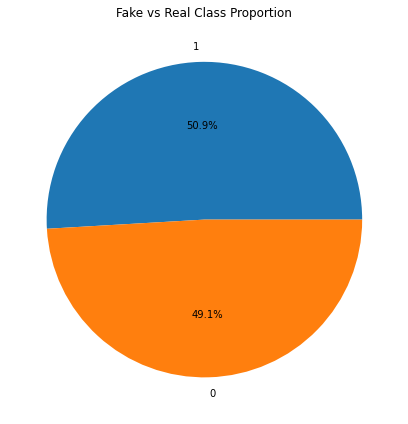

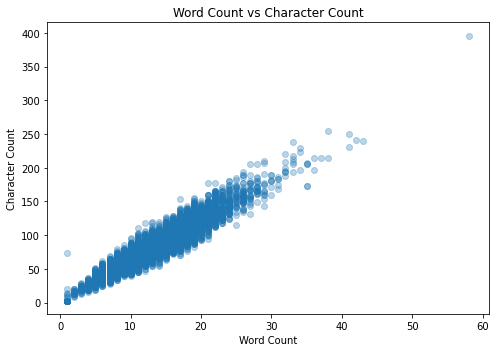

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Detecting main text column (longest text-type column)
text_column = None
for col in df.columns:
    if df[col].dtype == 'object' and df[col].str.len().mean() > 20:
        text_column = col
        break

print(f"\nDetected Text Column: {text_column}")

# Text Length Distribution
if text_column:
    df['text_length'] = df[text_column].apply(lambda x: len(str(x)))

    plt.figure(figsize=(8,5))
    plt.hist(df['text_length'], bins=40)
    plt.title(f"Distribution of Text Lengths ({text_column})")
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
else:
    print("No long text column detected.")

# Box Plot - Text Length vs Target

if text_column:
    plt.figure(figsize=(7,5))
    plt.boxplot([
        df[df[target_col] == 0]['text_length'],
        df[df[target_col] == 1]['text_length']
    ], labels=['Fake', 'Real'])
    plt.title("Text Length Distribution: Fake vs Real")
    plt.ylabel("Text Length")
    plt.tight_layout()
    plt.show()

# Word Frequency - Fake vs Real

if text_column:
    # Convert to string + handle missing values
    fake_series = df[df[target_col] == 0][text_column].fillna("").astype(str)
    real_series = df[df[target_col] == 1][text_column].fillna("").astype(str)

    fake_words = " ".join(fake_series).lower()
    real_words = " ".join(real_series).lower()

    fake_common = Counter(re.findall(r'\b\w+\b', fake_words)).most_common(15)
    real_common = Counter(re.findall(r'\b\w+\b', real_words)).most_common(15)

    # --- Fake News Words ---
    labels_f, counts_f = zip(*fake_common)
    plt.figure(figsize=(12,4))
    plt.bar(labels_f, counts_f)
    plt.xticks(rotation=45)
    plt.title("Top 15 Words in Fake News")
    plt.tight_layout()
    plt.show()

    # --- Real News Words ---
    labels_r, counts_r = zip(*real_common)
    plt.figure(figsize=(12,4))
    plt.bar(labels_r, counts_r)
    plt.xticks(rotation=45)
    plt.title("Top 15 Words in Real News")
    plt.tight_layout()
    plt.show()
# Pie Chart of Target Distribution

sizes = df[target_col].value_counts().values
labels = df[target_col].value_counts().index.astype(str)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Fake vs Real Class Proportion")
plt.tight_layout()
plt.show()


# Scatter Plot - Word Count vs Character Count

if text_column:
    df['word_count'] = df[text_column].apply(lambda x: len(str(x).split()))
    df['char_count'] = df[text_column].apply(lambda x: len(str(x)))

    plt.figure(figsize=(7,5))
    plt.scatter(df['word_count'], df['char_count'], alpha=0.3)
    plt.title("Word Count vs Character Count")
    plt.xlabel("Word Count")
    plt.ylabel("Character Count")
    plt.tight_layout()
    plt.show()

    

# Step 5 : Text Cleaning

In [5]:
import re
import numpy as np

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)        # Removing URLs
    text = re.sub(r"[^a-zA-Z ]", " ", text)          # Removing numbers & punctuation
    text = re.sub(r"\s+", " ", text).strip()         # Removing extra spaces
    return text

if text_column:
    df[text_column] = df[text_column].apply(clean_text)
    print("\nText cleaning completed.")
else:
    print("\nNo text column found for cleaning.")



Text cleaning completed.


# Step 6 : Splitting the dataset into training and testing

In [6]:
from sklearn.model_selection import train_test_split

X = df[text_column].values
y = df[target_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain-Test Split Completed")
print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train-Test Split Completed
Train size: 12000
Test size: 3000


# Step 7: Tokenization & Padding

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 50000   # Vocabulary size
max_length = 250    # Max sequence length

# Fitting tokenizer on training data
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print("\nTokenizer Vocabulary Size:", len(word_index))

# Converting text to integer sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

print("\nPadding applied (max_length =", max_length, ")")
print("Train padded shape:", X_train_pad.shape)
print("Test padded shape:", X_test_pad.shape)

# 7.4: Final label preparation
y_train = np.array(y_train)
y_test = np.array(y_test)

print("\nPreprocessing Completed Successfully!")



Tokenizer Vocabulary Size: 14567

Padding applied (max_length = 250 )
Train padded shape: (12000, 250)
Test padded shape: (3000, 250)

Preprocessing Completed Successfully!


# Step 8 : Training and Evaluation of Machine and Deep Learning Algorithms

# Machine Learning

# Logistic Regression (Machine Learning – Baseline)

# TF-IDF Vectorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF Train shape:", X_train_tfidf.shape)
print("TF-IDF Test shape:", X_test_tfidf.shape)


TF-IDF Train shape: (12000, 5000)
TF-IDF Test shape: (3000, 5000)


# Common Evaluation Utilities

In [10]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import numpy as np


# Evaluation Function for Machine learning Algorithm

In [11]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    
    print(f"\n========== {model_name} Evaluation ==========")
    
    # 1. Classification Report
    print("\n--- Classification Report ---")
    print(classification_report(y_true, y_pred))
    
    # 2. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\n--- Confusion Matrix ---")
    print(cm)
    
    plt.figure(figsize=(5,4))
    plt.imshow(cm)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    
    # 3. ROC-AUC Score
    auc_score = roc_auc_score(y_true, y_prob)
    print(f"\nROC-AUC Score: {auc_score:.4f}")
    
    # 4. ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Logistic Regression Evaluation


========== Logistic Regression Evaluation ==========

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1472
           1       0.87      0.88      0.88      1528

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000


--- Confusion Matrix ---
[[1265  207]
 [ 176 1352]]


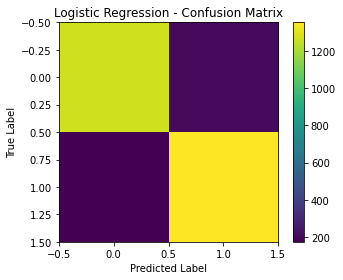


ROC-AUC Score: 0.9439


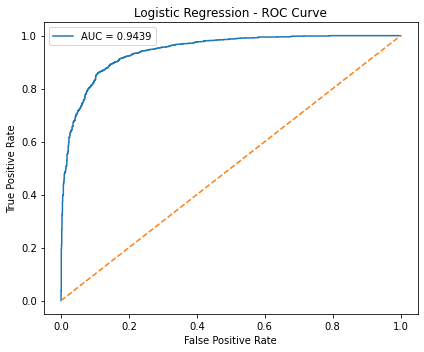

In [12]:
# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)
y_prob_lr = lr_model.predict_proba(X_test_tfidf)[:,1]

evaluate_model(
    y_test,
    y_pred_lr,
    y_prob_lr,
    "Logistic Regression"
)


# Deep Learning Algorithms

# Common Imports for Deep Learning Algorithms

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D,
    LSTM, Bidirectional, Dense, Dropout
)

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)


# Common Parameters

In [14]:
vocab_size    = 20000   
embedding_dim = 64      
max_length    = 150    
epochs     = 3
batch_size = 128


# Padding

In [15]:
X_train_pad = pad_sequences(
    X_train_seq,
    maxlen=max_length,
    padding='post',
    truncating='post'
)

X_test_pad = pad_sequences(
    X_test_seq,
    maxlen=max_length,
    padding='post',
    truncating='post'
)

print("Train padded shape:", X_train_pad.shape)
print("Test padded shape:", X_test_pad.shape)


Train padded shape: (12000, 150)
Test padded shape: (3000, 150)


# Common Evaluation Function for Deep Learning Algorithms

In [20]:
def evaluate_dl_model(model, X_test, y_test, model_name):
    
    y_prob = model.predict(X_test).ravel()
    y_pred = (y_prob > 0.5).astype(int)

# Long Short Term Memory (LSTM)

# LSTM Model Definition

In [21]:
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 64)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1313089 (5.01 MB)
Trainable params: 1313089 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and Evaluating the Model

In [22]:
lstm_model.fit(
    X_train_pad, y_train,
    epochs=2,
    batch_size=batch_size,
    validation_split=0.2
)
evaluate_dl_model(lstm_model, X_test_pad, y_test, "LSTM")

Epoch 1/2
75/75 [==============================] - 290s 4s/step - loss: 0.6935 - accuracy: 0.5041 - val_loss: 0.6931 - val_accuracy: 0.5204
Epoch 2/2
94/94 [==============================] - 24s 248ms/step


# Convolutional Neural Network 

# CNN Model Definition

In [23]:
cnn_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 64)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 146, 128)          41088     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

#  Training and Evaluating the Model

In [24]:
cnn_model.fit(
    X_train_pad, y_train,
    epochs= 2,
    batch_size=batch_size,
    validation_split=0.2
)
evaluate_dl_model(cnn_model, X_test_pad, y_test, "CNN")

Epoch 1/2
75/75 [==============================] - 76s 992ms/step - loss: 0.5627 - accuracy: 0.7212 - val_loss: 0.3196 - val_accuracy: 0.8654
Epoch 2/2
94/94 [==============================] - 7s 69ms/step


# Bi-Directional LSTM (BiLSTM)

# BiLSTM Model Defintion

In [25]:
bilstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

bilstm_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 64)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1346177 (5.14 MB)
Trainable params: 1346177 (5.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and Evaluating the Model

In [26]:
bilstm_model.fit(
    X_train_pad, y_train,
    epochs=2,
    batch_size=batch_size,
    validation_split=0.2
)
evaluate_dl_model(bilstm_model, X_test_pad, y_test, "BiLSTM")


Epoch 1/2
75/75 [==============================] - 510s 7s/step - loss: 0.5780 - accuracy: 0.7101 - val_loss: 0.3749 - val_accuracy: 0.8675
Epoch 2/2
94/94 [==============================] - 36s 353ms/step


# Step 9 : Comparative and Results Analysis

94/94 [==============================] - 35s 372ms/step

Model Performance Comparison Table

                 Model  Accuracy  F1-Score   ROC-AUC
0  Logistic Regression  0.872333  0.875931  0.943946
1                  CNN  0.890667  0.894398  0.954926
2                 LSTM  0.490667       NaN  0.500000
3               BiLSTM  0.883000  0.889449  0.953423


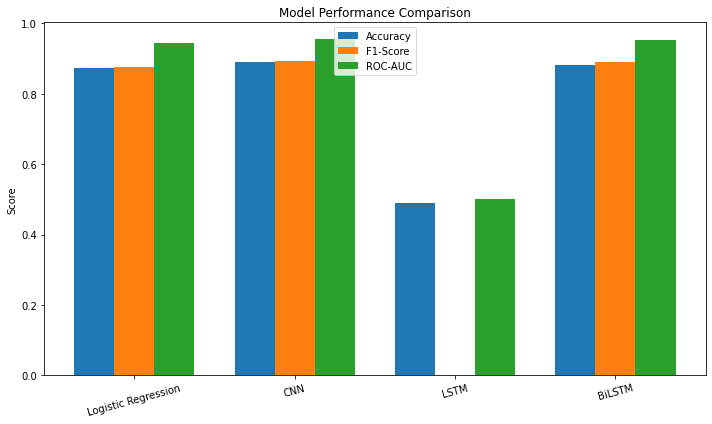

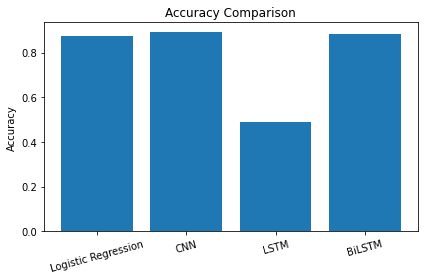

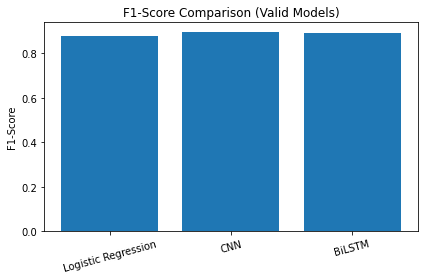

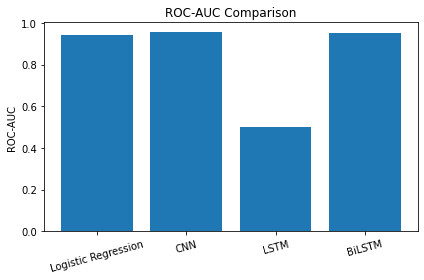

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score



# Building prediction outputs


# CNN
y_prob_cnn = cnn_model.predict(X_test_pad).ravel()
y_pred_cnn = (y_prob_cnn > 0.5).astype(int)

# LSTM
y_prob_lstm = lstm_model.predict(X_test_pad).ravel()
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)

# BiLSTM
y_prob_bilstm = bilstm_model.predict(X_test_pad).ravel()
y_pred_bilstm = (y_prob_bilstm > 0.5).astype(int)



# Creating results table


results = {
    "Model": [
        "Logistic Regression",
        "CNN",
        "LSTM",
        "BiLSTM"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_cnn),
        accuracy_score(y_test, y_pred_lstm),
        accuracy_score(y_test, y_pred_bilstm)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_cnn),
        np.nan,   
        f1_score(y_test, y_pred_bilstm)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_cnn),
        roc_auc_score(y_test, y_prob_lstm),
        roc_auc_score(y_test, y_prob_bilstm)
    ]
}

results_df = pd.DataFrame(results)

print("\nModel Performance Comparison Table\n")
print(results_df)



# Plotting combined comparison graph


metrics = ["Accuracy", "F1-Score", "ROC-AUC"]
x = np.arange(len(results_df))
width = 0.25

plt.figure(figsize=(10,6))

for i, metric in enumerate(metrics):
    plt.bar(
        x + i*width,
        results_df[metric],
        width,
        label=metric
    )

plt.xticks(x + width, results_df["Model"], rotation=15)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()



# Individual metric plots


# Accuracy plot (all models)
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# F1-score plot
f1_df = results_df.dropna(subset=["F1-Score"])

plt.figure(figsize=(6,4))
plt.bar(f1_df["Model"], f1_df["F1-Score"])
plt.title("F1-Score Comparison (Valid Models)")
plt.ylabel("F1-Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# ROC-AUC plot (all models)
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["ROC-AUC"])
plt.title("ROC-AUC Comparison")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
